# Compte Rendu de projet

###### realiser par : EL QASEMY SOUFIANE


## Analyse et conception des algorithmes
**Objectif**
*Ce projet vise à fournir un ensemble de fonctions pour visualiser et animer les graphes en utilisant 
la bibliothèque Matplotlib en Python*

### Partie 1 : (10 Points)
*Créer une fonction permettant d’afficher un graphe non-orienté en utilisant matplotlib.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def afficher_graphe(liste_adjacence):
    # Générer les positions pour chaque nœud dans une disposition circulaire
    noeuds = list(liste_adjacence.keys())  # Récupérer la liste des nœuds
    nb_noeuds = len(noeuds)  # Calculer le nombre de nœuds
    angles = np.linspace(0, 2 * np.pi, nb_noeuds, endpoint=False).tolist()  # Générer des angles également espacés
    positions = {noeud: (np.cos(angle), np.sin(angle)) for noeud, angle in zip(noeuds, angles)}  # Calculer les positions des nœuds sur le cercle

    fig, ax = plt.subplots()  # Créer une nouvelle figure et un axe
    ax.set_aspect('equal')  # Assurer que le graphe a la même échelle sur les deux axes

    # Dessiner les arêtes
    for noeud, voisins in liste_adjacence.items():  # Pour chaque nœud et ses voisins
        for voisin in voisins:
            debut_pos = positions[noeud]  # Récupérer la position de départ
            fin_pos = positions[voisin]  # Récupérer la position de fin
            ax.plot([debut_pos[0], fin_pos[0]], [debut_pos[1], fin_pos[1]], 'gray')  # Dessiner une ligne entre les positions

    # Dessiner les nœuds
    for noeud, pos in positions.items():  # Pour chaque nœud
        ax.plot(pos[0], pos[1], 'o', color='lightgray', markersize=30)  # Dessiner un cercle pour le nœud
        ax.text(pos[0], pos[1], noeud, fontsize=12, ha='center', va='center')  # Ajouter le nom du nœud au centre du cercle

    # Supprimer les axes
    ax.set_xticks([])  # Supprimer les graduations de l'axe x
    ax.set_yticks([])  # Supprimer les graduations de l'axe y
    
    plt.show()  # Afficher la figure contenant le graphe


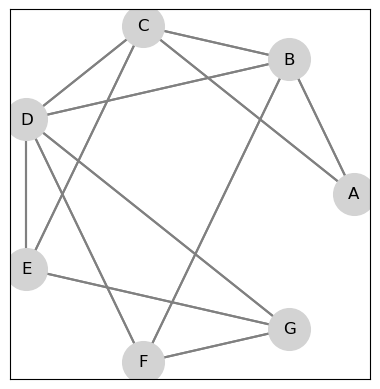

In [2]:
# Example adjacency list
liste_adjacence = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D', 'F'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['B', 'C', 'E', 'F', 'G'],
    'E': ['C', 'D', 'G'],
    'F': ['B', 'D', 'G'],
    'G': ['D', 'E', 'F']
}

afficher_graphe(liste_adjacence)


# Explication


Cette méthode gère manuellement la visualisation du graphe en utilisant les fonctionnalités de base de Matplotlib et une liste d'adjacence basée sur un dictionnaire.


### Partie 2 : (2 Points)
Adapter votre fonction pour qu’elle affiche aussi un graphe orienté.

### Fonction `afficher_graphe_orienté(liste_adjacence)` :

Cette fonction dessine un graphe orienté (digraphe), c'est-à-dire un graphe où les arêtes ont une direction. Cela est représenté par des flèches pointant du nœud de départ vers le nœud de destination.

- **Utilisation de `ax.arrow()`** :
  - Pour dessiner les arêtes comme des flèches avec des pointes.
  - Cette méthode permet de spécifier la position de départ et la position de fin de l'arête, en ajustant la longueur de la flèche pour arriver précisément au bord des nœuds.

- **Ajout de paramètres** :
  - `head_width`, `head_length`, `fc`, `ec`, et `length_includes_head` pour personnaliser l'apparence des flèches.


In [20]:
import matplotlib.pyplot as plt
import numpy as np

def afficher_graphe_orienté(liste_adjacence):
    # Générer les positions pour chaque nœud dans une disposition circulaire
    noeuds = list(liste_adjacence.keys())
    nb_noeuds = len(noeuds)
    angles = np.linspace(0, 2 * np.pi, nb_noeuds, endpoint=False).tolist()
    positions = {noeud: (np.cos(angle), np.sin(angle)) for noeud, angle in zip(noeuds, angles)}

    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # Dessiner les arêtes orientées
    for noeud, voisins in liste_adjacence.items():
        debut_pos = positions[noeud]
        for voisin in voisins:
            fin_pos = positions[voisin]
            delta_x = fin_pos[0] - debut_pos[0]
            delta_y = fin_pos[1] - debut_pos[1]
            length = np.sqrt(delta_x ** 2 + delta_y ** 2)

            # Ajuster la longueur de la flèche pour arriver précisément au bord des nœuds
            arrow_head_size = 0.1
            head_offset = arrow_head_size / length
            delta_x = (1 - head_offset) * delta_x
            delta_y = (1 - head_offset) * delta_y

            ax.arrow(debut_pos[0], debut_pos[1], delta_x, delta_y, head_width=0.05, head_length=arrow_head_size, fc='gray', ec='gray', length_includes_head=True)

    # Dessiner les nœuds
    node_radius = 0.1
    for noeud, pos in positions.items():
        ax.plot(pos[0], pos[1], 'o', color='lightgray', markersize=30)
        ax.text(pos[0], pos[1], noeud, fontsize=12, ha='center', va='center')

    # Supprimer les axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    plt.show()




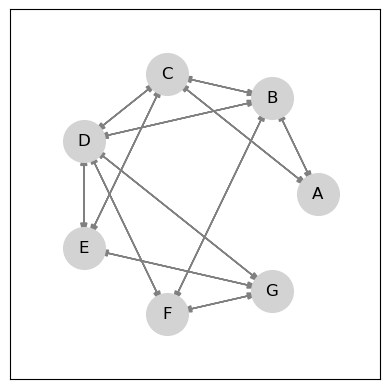

In [21]:
# Exemple de liste d'adjacence
liste_adjacence = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D', 'F'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['B', 'C', 'E', 'F', 'G'],
    'E': ['C', 'D', 'G'],
    'F': ['B', 'D', 'G'],
    'G': ['D', 'E', 'F']
}

afficher_graphe_orienté(liste_adjacence)

In [22]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
# Définition du graphe avec des connexions bidirectionnelles et positions des nœuds pour l'affichage
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'F'],
    'C': ['A', 'E', 'D'],
    'D': ['B', 'E', 'F'],
    'E': ['C', 'D', 'G'],
    'F': ['B', 'D', 'G'],
    'G': ['E', 'F'],
    'H': ['G']
}
positions = {
    'A': (0, 2),
    'B': (1, 3),
    'C': (1, 1),
    'D': (2, 2),
    'E': (3, 1),
    'F': (3, 3),
    'G': (4, 2),
    'H': (5, 1),
}

# Initialisation des couleurs, le nœud 'A' est en rouge
colors = {node: 'lightgrey' for node in graph}
colors['A'] = 'red'

# Définition des fonctions utilitaires

In [23]:
# Fonction pour ajuster les positions des arêtes afin qu'elles ne pénètrent pas dans les nœuds
def adjust_edge_position(start, end, node_size):
    """ Ajuster les positions des arêtes pour qu'elles ne pénètrent pas dans les nœuds. """
    direction = np.array(end) - np.array(start)
    length = np.linalg.norm(direction)
    direction = direction / length

    start_adjusted = np.array(start) + direction * node_size
    end_adjusted = np.array(end) - direction * node_size

    return start_adjusted, end_adjusted

# Fonction pour dessiner le graphe
def draw_graph(ax, positions, colors, graph, node_size=0.15):
    ax.clear()
    ax.set_xlim(-1, 6)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal')
    ax.axis('off')  # Désactiver les axes

    # Dessiner les arêtes
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            start_pos = positions[node]
            end_pos = positions[neighbor]
            start_adjusted, end_adjusted = adjust_edge_position(start_pos, end_pos, node_size)
            ax.plot([start_adjusted[0], end_adjusted[0]], [start_adjusted[1], end_adjusted[1]], 'black', linewidth=2)

    # Dessiner les nœuds
    for node, pos in positions.items():
        ax.plot(pos[0], pos[1], 'o', markeredgecolor='black', markeredgewidth=2, color=colors[node], markersize=30)
        ax.text(pos[0], pos[1], node, color='black', ha='center', va='center', fontsize=12, fontweight='bold')

# Fonction pour exécuter la recherche en largeur (BFS)
def bfs(graph, start):
    visited = {node: False for node in graph}
    queue = deque([(start, 0)])  # Ajouter la profondeur dans la file
    visited[start] = True
    order = []

    while queue:
        node, depth = queue.popleft()
        order.append((node, depth))
        for neighbor in graph[node]:
            if not visited[neighbor]:
                queue.append((neighbor, depth + 1))
                visited[neighbor] = True
    return order

In [24]:
# Exécution de BFS pour obtenir l'ordre de visite avec les profondeurs
bfs_order = bfs(graph, 'A')

In [25]:
# Vérification des nœuds non visités et ajout
all_nodes = set(graph.keys())
visited_nodes = set(node for node, _ in bfs_order)
remaining_nodes = all_nodes - visited_nodes

for node in remaining_nodes:
    bfs_order.append((node, max(depth for _, depth in bfs_order) + 1))

# Initialisation des couleurs pour l'animation
frames = []
frame_colors = colors.copy()
color_palette = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']  # Palette de couleurs vives
for i, (node, depth) in enumerate(bfs_order):
    frame_colors[node] = color_palette[depth % len(color_palette)]  # Utilisation de la palette de couleurs
    frames.append(frame_colors.copy())


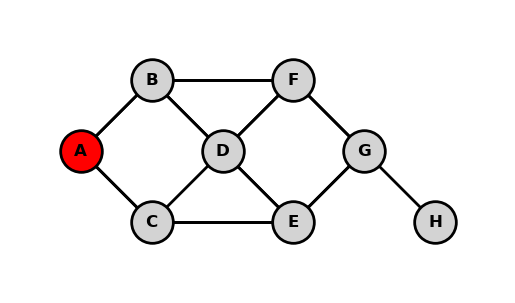

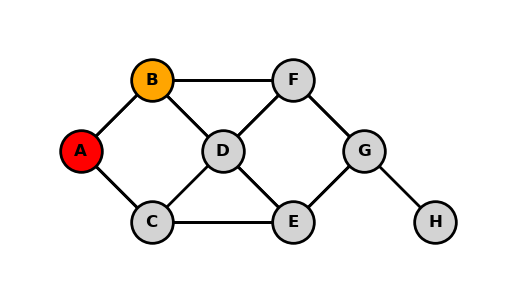

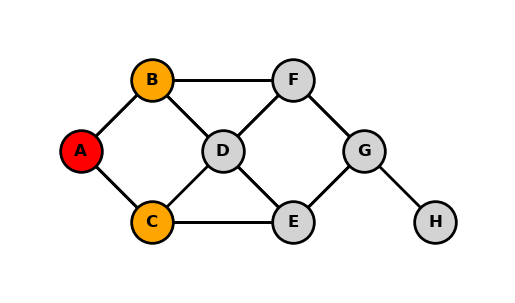

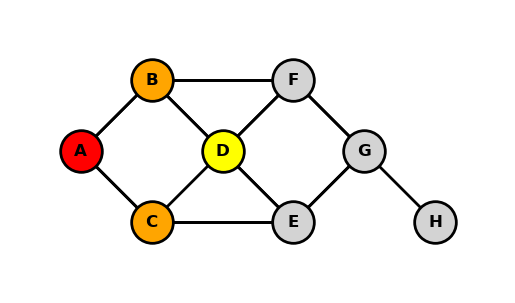

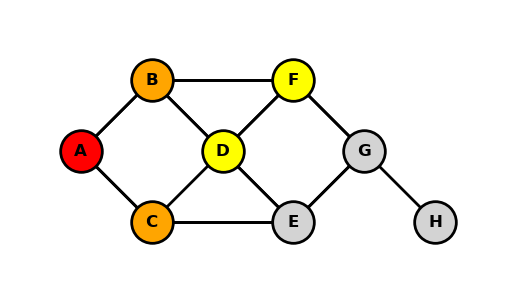

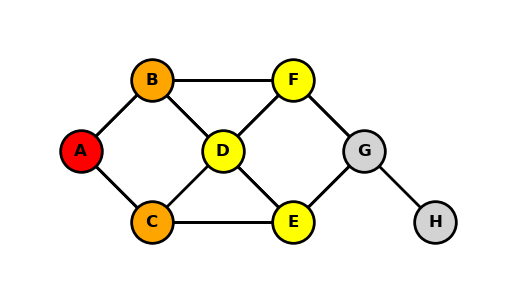

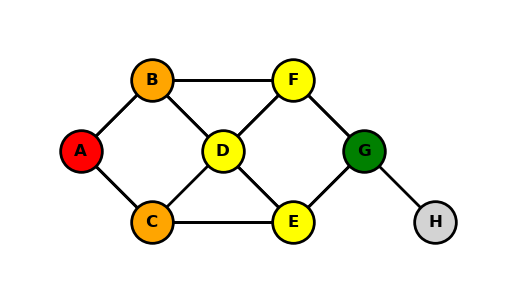

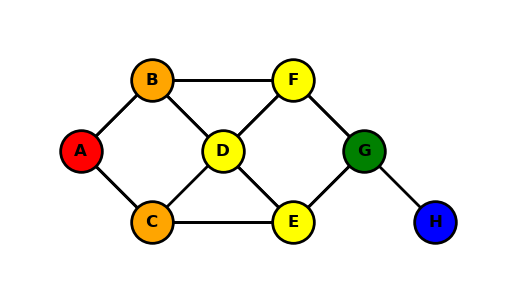

In [26]:
# Affichage de l'animation frame par frame
for frame in frames:
    fig, ax = plt.subplots()
    draw_graph(ax, positions, frame, graph)
    plt.show()
